Mounted at /content/drive
📂 Drive 연결 완료!
📄 CSV 경로: /content/drive/MyDrive/receipt_model/receipts.csv
📦 모델 경로: /content/drive/MyDrive/receipt_model/model.pkl
🔤 벡터라이저 경로: /content/drive/MyDrive/receipt_model/vectorizer.pkl
=== 📌 원본 데이터 미리보기 ===


,filename,text,category,price,date
0,20251113_알촌_8300.jpg,알촌 식비 8300원,식비,8300,2025-11-13
1,20251117_죠스아이스크림_1400.jpg,죠스아이스크림 편의점/마트 1400원,편의점/마트,1400,2025-11-17
2,20251117_죠스아이스크림_1500.jpg,죠스아이스크림 편의점/마트 1500원,편의점/마트,1500,2025-11-17
3,20251118_매머드익스프레스_1100.jpg,매머드익스프레스 카페 1100원,카페,1100,2025-11-18
4,20251118_매머드익스프레스_3400.jpg,매머드익스프레스 카페 3400원,카페,3400,2025-11-18



📌 데이터 개수: 27

📌 텍스트(X) / 라벨(y) 설정 완료!

=== 📌 데이터 분할 중 ===
Train: 18
Validation: 4
Test: 5

📦 모델 및 벡터라이저 로드 완료!

🎯 Test Accuracy: 1.0000

=== 📌 Classification Report (Test Set) ===
              precision    recall  f1-score   support

          식비       1.00      1.00      1.00         3
      편의점/마트       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54168 (\N{HANGUL SYLLABLE PE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/l

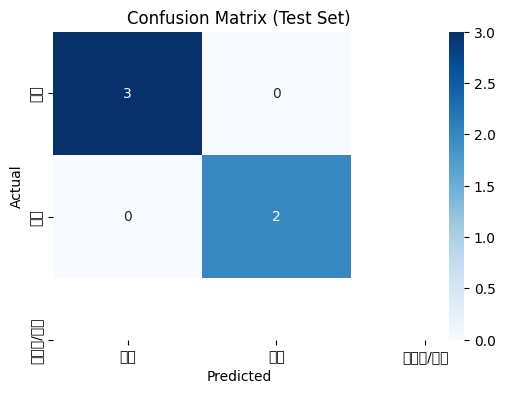


=== 📊 평가 표(DataFrame) ===


,precision,recall,f1-score,support
식비,1.0,1.0,1.0,3.0
편의점/마트,1.0,1.0,1.0,2.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,5.0
weighted avg,1.0,1.0,1.0,5.0



=== 📌 Cross-Validation 시작 (5-Fold) ===
Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 1.0000
Fold 3 Accuracy: 1.0000
Fold 4 Accuracy: 0.8000
Fold 5 Accuracy: 0.8000

⭐ Cross-Validation 평균 Accuracy: 0.9199999999999999


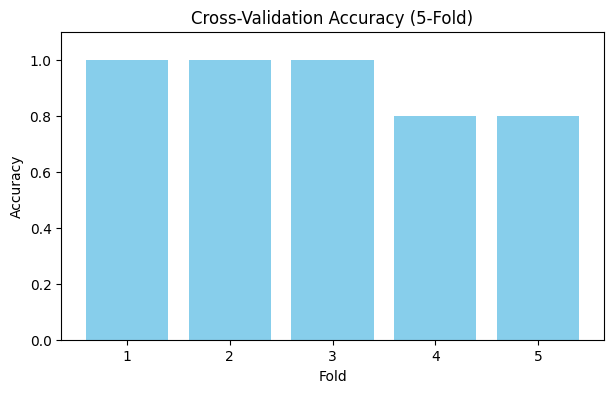


🔥 Evaluation (Test + Cross-Validation) notebook 완료!


In [17]:
# ===============================================================
# 📌 0. Google Drive Mount
# ===============================================================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

print("📂 Drive 연결 완료!")

csv_path = "/content/drive/MyDrive/receipt_model/receipts.csv"
model_path = "/content/drive/MyDrive/receipt_model/model.pkl"
vectorizer_path = "/content/drive/MyDrive/receipt_model/vectorizer.pkl"

print(f"📄 CSV 경로: {csv_path}")
print(f"📦 모델 경로: {model_path}")
print(f"🔤 벡터라이저 경로: {vectorizer_path}")


# ===============================================================
# 📌 1. 데이터 로드
# ===============================================================
import pandas as pd

df = pd.read_csv(csv_path)
print("=== 📌 원본 데이터 미리보기 ===")
display(df.head())
print(f"\n📌 데이터 개수: {len(df)}")


# ===============================================================
# 📌 2. Feature / Label 분리
# ===============================================================
X = df["text"]
y = df["category"]

print("\n📌 텍스트(X) / 라벨(y) 설정 완료!")


# ===============================================================
# 📌 3. Train / Validation / Test Split
#     (⚠ stratify 제거 — 소량 데이터에서 오류 방지)
# ===============================================================
from sklearn.model_selection import train_test_split

print("\n=== 📌 데이터 분할 중 ===")

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

print("Train:", len(X_train))
print("Validation:", len(X_val))
print("Test:", len(X_test))


# ===============================================================
# 📌 4. 저장된 모델 및 벡터라이저 로드
# ===============================================================
import joblib

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

print("\n📦 모델 및 벡터라이저 로드 완료!")


# ===============================================================
# 📌 5. Test 세트 평가
# ===============================================================
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test_vec = vectorizer.transform(X_test)
y_pred = model.predict(X_test_vec)

test_acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Test Accuracy: {test_acc:.4f}")

print("\n=== 📌 Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred))


# ===============================================================
# 📌 6. Confusion Matrix 시각화
# ===============================================================
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ===============================================================
# 📌 7. 성능 표(DataFrame) 형태로 정리 — 과제 요구사항 충족
# ===============================================================
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("\n=== 📊 평가 표(DataFrame) ===")
display(report_df)


# ===============================================================
# 📌 8. Cross-Validation (5-Fold) — 과제 필수요소
# ===============================================================
from sklearn.model_selection import KFold
import numpy as np

print("\n=== 📌 Cross-Validation 시작 (5-Fold) ===")

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_acc = []

X_vec = vectorizer.transform(X)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_vec), start=1):
    X_tr = X_vec[train_idx]
    X_va = X_vec[val_idx]
    y_tr = y.iloc[train_idx]
    y_va = y.iloc[val_idx]

    clf = joblib.load(model_path)  # fold마다 새로운 모델 사용
    clf.fit(X_tr, y_tr)

    preds = clf.predict(X_va)
    acc = accuracy_score(y_va, preds)
    fold_acc.append(acc)

    print(f"Fold {fold} Accuracy: {acc:.4f}")

print("\n⭐ Cross-Validation 평균 Accuracy:", np.mean(fold_acc))


# ===============================================================
# 📌 9. Cross-Validation Accuracy 그래프
# ===============================================================
plt.figure(figsize=(7,4))
plt.bar(range(1, 6), fold_acc, color='skyblue')
plt.title("Cross-Validation Accuracy (5-Fold)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.show()


# ===============================================================
# 📌 10. 종료 메시지
# ===============================================================
print("\n🔥 Evaluation (Test + Cross-Validation) notebook 완료!")
